# Neural Networks for Pima Indian dataset

## Import packages

In [13]:
import pandas as pd
import os
import data
from model import MLP
import tensorflow as tf
import helper
import itertools
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SparsePCA
seed=1
np.random.seed(seed)

In [2]:
#TensorFlow version
print(tf.__version__)

1.5.0


## Data Processing

Retrieve imputed train and test sets 

In [2]:
currentPath = os.getcwd()
test_list = data.testImputed(currentPath=currentPath)
train = data.trainImputed(currentPath=currentPath)

Split Outcome into two columns instead of 1: Diabetic and Not_Diabetic

In [3]:
#For train
train["Not Diabetic"] = (train["Outcome"] == 0).astype(int)
train.rename(columns={"Outcome": "Diabetic"}, inplace=True)

#For test
for i in range(len(test_list)):
    test_list[i]["Not Diabetic"] = (test_list[i]["Outcome"] == 0).astype(int)
    test_list[i].rename(columns={"Outcome": "Diabetic"}, inplace=True)

Split into target and features.

In [4]:
X_train = train.as_matrix()[:,0:-2]
y_train = train.as_matrix()[:, -2:]
test_split_list = list()

#First element is X, second element is y
for i in range(len(test_list)):
    test_split_list.append( [ test_list[i].as_matrix()[:,0:-2],
                         test_list[i].as_matrix()[:,-2:] ] )


Scale the features.

In [5]:
X_test = test_split_list[0][0]
y_test = test_split_list[0][1]
scale_X = StandardScaler()
scale_X.fit(X_train)
X_train_scaled = scale_X.transform(X_train)
X_test_scaled = scale_X.transform(X_test)

## Initial Run: Initiate and train a Multi-layer Perceptron

In [6]:
inputDim = X_train_scaled.shape[1]
outputDim = y_train.shape[1]
mlp = MLP()
mlp.buildModel(neurons=[10,10,10,10], activations=["relu", "relu", "relu", "relu"], 
               dropout=[0.5,0.5,0.5,0.5], inputDim=inputDim, outputDim=outputDim)

In [7]:
%matplotlib inline
mlp.train(X=X_train_scaled, y=y_train, X_test=X_test_scaled, y_test=y_test, num_epochs=5000, lr=0.0001, seed=1)

Epoch 1 : Training loss: 0.70648676157, 
 test accuracy : 0.342857152224

Epoch 11 : Training loss: 0.702401518822, 
 test accuracy : 0.342857152224

Epoch 21 : Training loss: 0.70127260685, 
 test accuracy : 0.342857152224

Epoch 31 : Training loss: 0.703016161919, 
 test accuracy : 0.342857152224

Epoch 41 : Training loss: 0.69585609436, 
 test accuracy : 0.342857152224

Epoch 51 : Training loss: 0.695337116718, 
 test accuracy : 0.657142877579

Epoch 61 : Training loss: 0.685764968395, 
 test accuracy : 0.657142877579

Epoch 71 : Training loss: 0.682702302933, 
 test accuracy : 0.657142877579

Epoch 81 : Training loss: 0.686173856258, 
 test accuracy : 0.657142877579

Epoch 91 : Training loss: 0.68150472641, 
 test accuracy : 0.657142877579

Epoch 101 : Training loss: 0.672257125378, 
 test accuracy : 0.657142877579

Epoch 111 : Training loss: 0.668359220028, 
 test accuracy : 0.657142877579

Epoch 121 : Training loss: 0.652190566063, 
 test accuracy : 0.657142877579

Epoch 131 : Tr

KeyboardInterrupt: 

## Cross validation to choose parameters

In [14]:
import helper
import model
reload(helper)
reload(model)

<module 'model' from 'model.py'>

In [7]:
neurons=[[30,20,10],
         [50,40,30,20,10],
         [30,25,20,15],
        [50,30,40],
        [30,20],
        [40,35,30,25,20,15,10],
        [20,10,5,3]]

activations=[['relu']*3,
             ['relu6']*5,
             ['relu6']*4,
             ['sigmoid']*3,
             ['elu']*2,
             ['relu6']*7,
             ['tanh']*4
            ]

dropout = [[0.8]*3,
           [0.8]*5,
           [0.8]*4,
           [0.5]*3,
           [0.7]*2,
           [0.6]*7,
           [0.9]*4
          ]

lr = [0.0001, 0.001, 0.0005, 0.0001, 0.0003]

helper.CV_pipeline(X_train_scaled, y_train, neurons, activations, dropout,
                   lr, inputDim=X_train_scaled.shape[1], outputDim=2, seed=seed)

Parameter set 1:
Cross validation set: 1
Accuracy: 0.75
Cross validation set: 2
Accuracy: 0.728571428571
Cross validation set: 3
Accuracy: 0.757142857143
Cross validation set: 4
Accuracy: 0.807142857143
Cross validation set: 5
Accuracy: 0.804347826087

Parameter set 2:
Cross validation set: 1
Accuracy: 0.7
Cross validation set: 2
Accuracy: 0.664285714286
Cross validation set: 3
Accuracy: 0.707142857143
Cross validation set: 4
Accuracy: 0.75
Cross validation set: 5
Accuracy: 0.710144927536

Parameter set 3:
Cross validation set: 1
Accuracy: 0.714285714286
Cross validation set: 2
Accuracy: 0.707142857143
Cross validation set: 3
Accuracy: 0.685714285714
Cross validation set: 4
Accuracy: 0.821428571429
Cross validation set: 5
Accuracy: 0.746376811594

Parameter set 4:
Cross validation set: 1
Accuracy: 0.742857142857
Cross validation set: 2
Accuracy: 0.721428571429
Cross validation set: 3
Accuracy: 0.742857142857
Cross validation set: 4
Accuracy: 0.807142857143
Cross validation set: 5
Accur

## Train on Full Data Set

Epoch 1 : Training loss: 0.681595921516, 
 test accuracy : 0.657142877579

Epoch 11 : Training loss: 0.675879538059, 
 test accuracy : 0.657142877579

Epoch 21 : Training loss: 0.658284425735, 
 test accuracy : 0.657142877579

Epoch 31 : Training loss: 0.613141655922, 
 test accuracy : 0.671428561211

Epoch 41 : Training loss: 0.574695467949, 
 test accuracy : 0.785714268684

Epoch 51 : Training loss: 0.492916703224, 
 test accuracy : 0.785714268684

Epoch 61 : Training loss: 0.492948234081, 
 test accuracy : 0.785714268684

Epoch 71 : Training loss: 0.459458619356, 
 test accuracy : 0.757142841816

Epoch 81 : Training loss: 0.445783853531, 
 test accuracy : 0.757142841816

Epoch 91 : Training loss: 0.454318463802, 
 test accuracy : 0.757142841816

Epoch 101 : Training loss: 0.449540525675, 
 test accuracy : 0.771428585052

Epoch 111 : Training loss: 0.449619531631, 
 test accuracy : 0.771428585052

Epoch 121 : Training loss: 0.42033919692, 
 test accuracy : 0.771428585052

Epoch 131 :

Epoch 1091 : Training loss: 0.32111954689, 
 test accuracy : 0.785714268684

Epoch 1101 : Training loss: 0.279783308506, 
 test accuracy : 0.785714268684

Epoch 1111 : Training loss: 0.331587821245, 
 test accuracy : 0.785714268684

Epoch 1121 : Training loss: 0.318917542696, 
 test accuracy : 0.785714268684

Epoch 1131 : Training loss: 0.318982064724, 
 test accuracy : 0.785714268684

Epoch 1141 : Training loss: 0.297131299973, 
 test accuracy : 0.785714268684

Epoch 1151 : Training loss: 0.330166041851, 
 test accuracy : 0.757142841816

Epoch 1161 : Training loss: 0.307197034359, 
 test accuracy : 0.785714268684

Epoch 1171 : Training loss: 0.344839096069, 
 test accuracy : 0.771428585052

Epoch 1181 : Training loss: 0.318485081196, 
 test accuracy : 0.785714268684

Epoch 1191 : Training loss: 0.326407700777, 
 test accuracy : 0.757142841816

Epoch 1201 : Training loss: 0.328310400248, 
 test accuracy : 0.757142841816

Epoch 1211 : Training loss: 0.313116341829, 
 test accuracy : 0.7

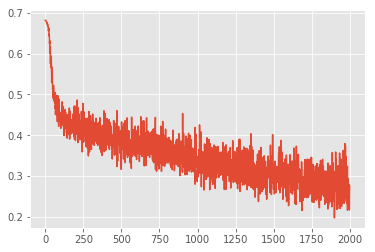

In [10]:
inputDim = X_train_scaled.shape[1]
outputDim = y_train.shape[1]
mlp = MLP()
mlp.buildModel(neurons=[30,20,10], activations=['relu', 'relu', 'relu'], 
               dropout=[0.8,0.8, 0.8], inputDim=inputDim, outputDim=outputDim)

%matplotlib inline
results = mlp.train(X=X_train_scaled, y=y_train, X_test=X_test_scaled, y_test=y_test, 
                    num_epochs=2000, lr=0.0003, seed=seed)

## Predict on each test set

Predict on each scaled test set and obtain average accuracy

In [11]:
accuracy_list = list()

for ts in test_split_list:
    temp_scaled = scale_X.transform(ts[0])
    res = mlp.predict(X=temp_scaled, seed=seed)
    accuracy = (res["y_pred_cls"][:,0] == ts[1][:,0]).sum() / float(len(res["y_pred_cls"]))
    accuracy_list.append(accuracy)
    
print("The average accuracy on imputed test sets: {}".format(np.mean(accuracy_list)))

The average accuracy on imputed test sets: 0.785714285714


In [12]:
accuracy_list

[0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857,
 0.7857142857142857]

## Dimensionality Reduction Methods

PCA is often used as a dimensionality reduction method in machine learning. In this project, I would like to use sparse PCA, a variant of PCA which sets a constraint on the number of features used to produce the PCs. Sparse PCA minimizes the number of features used in producing the PCs. Use cross validation to choose number of components. **Other parameters such as shrinkage parameter and sparsity can be chosen using CV but currently not supported **